In [4]:
%pylab inline
from collections import Counter, defaultdict
import pandas as pd
import glob
import os
import seaborn as sns
sns.set_context('paper', font_scale=2)
sns.set_style('white')
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


Populating the interactive namespace from numpy and matplotlib


In [34]:
df_yeast = pd.read_table('../PNAS_2000_datasets/Yeast.txt', header=1)
df_yeast= df_yeast.loc[:, '0_min':]
df_yeast = df_yeast.replace('Null', np.nan)
df_yeast = df_yeast.astype(float)
df_yeast = df_yeast.dropna()

In [39]:
yeast_centered = df_yeast.sub(df_yeast.mean(axis=0), axis=1)


In [43]:
yeast_centered.std(axis=0)

0_min      1.897754
7_min      0.704637
14_min     0.768333
21_min     0.685677
28_min     0.498267
35_min     0.597403
42_min     0.504584
49_min     0.430234
56_min     0.435739
63_min     0.515987
70_min     0.425628
77_min     0.504596
84_min     0.304018
91_min     0.515470
98_min     0.437789
105_min    0.281748
112_min    0.365546
119_min    0.311826
dtype: float64

In [44]:
# Subtract mean vector along the columns and standardize it
yeast_centered = df_yeast.sub(df_yeast.mean(axis=0), axis=1)
yeast_centered = yeast_centered.div(yeast_centered.std(axis=0), axis=1)

In [45]:
yeast_centered.std(axis=0)

0_min      1.0
7_min      1.0
14_min     1.0
21_min     1.0
28_min     1.0
35_min     1.0
42_min     1.0
49_min     1.0
56_min     1.0
63_min     1.0
70_min     1.0
77_min     1.0
84_min     1.0
91_min     1.0
98_min     1.0
105_min    1.0
112_min    1.0
119_min    1.0
dtype: float64

In [46]:
df_human = pd.read_table('../PNAS_2000_datasets/Human.txt', header=1)
df_human = df_human.loc[:, '2_hr':]
df_human = df_human.replace('Null', np.nan)
df_human = df_human.astype(float)
df_human = df_human.dropna()



In [47]:
human_centered = df_human.sub(df_human.mean(axis=0), axis=1)
human_centered = human_centered.div(human_centered.std(axis=0), axis=1)

In [6]:
yeast = df_yeast.dropna().values
human = df_human.dropna().values

In [7]:
yeast.shape

(2698, 18)

In [8]:
human.shape

(4360, 18)

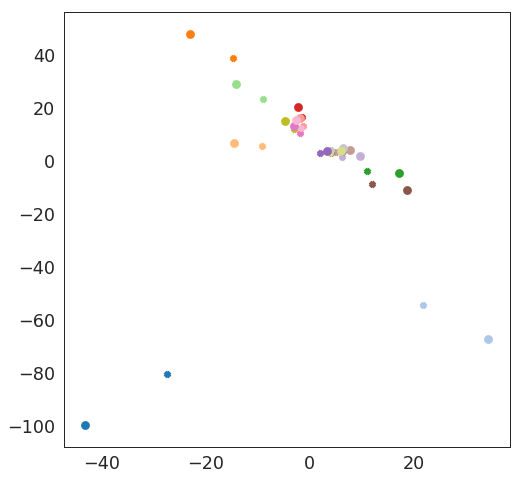

In [48]:
yeast_PCA = PCA(n_components=18)
yeast_PCA_components = yeast_PCA.fit(yeast).transform(yeast)

human_PCA = PCA(n_components=18)
human_PCA_components = human_PCA.fit(human).transform(human)

yeast_human_PCA_combined = np.vstack([yeast_PCA_components, human_PCA_components]).T

X = yeast_PCA_components.T
Y = human_PCA_components.T 

cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=sns.color_palette('tab20')[index], marker='x', lw=4)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=sns.color_palette('tab20')[index], marker='o', lw=4)




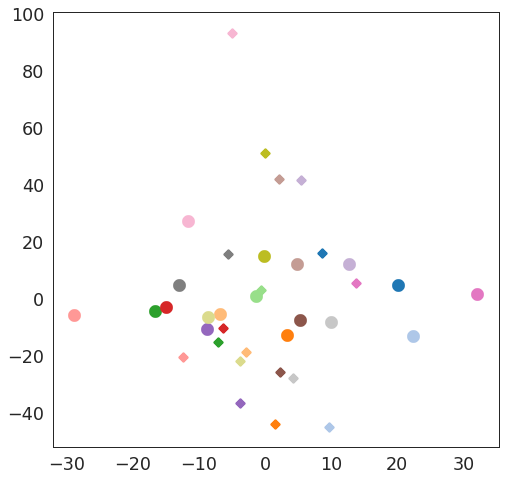

In [49]:
X = yeast.T
Y = human.T 

cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=sns.color_palette('tab20')[index], marker='x', lw=8)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=sns.color_palette('tab20')[index], marker='o', lw=8)


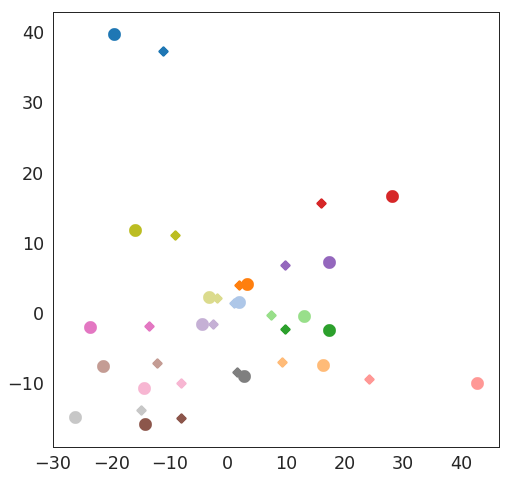

In [50]:
X = yeast_centered.T
Y = human_centered.T 

cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=sns.color_palette('tab20')[index], marker='x', lw=8)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=sns.color_palette('tab20')[index], marker='o', lw=8)


(-30, 40)

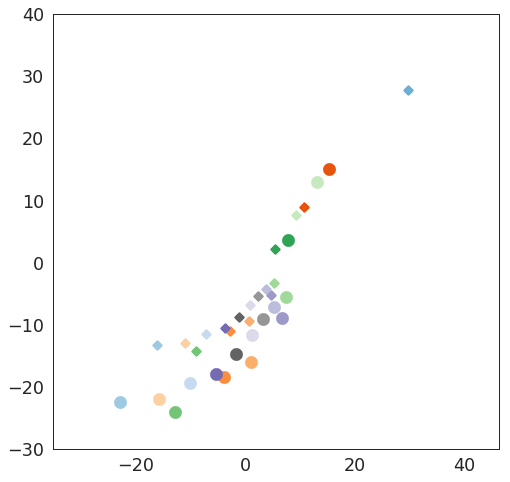

In [53]:
yeast_PCA = PCA(n_components=18)
yeast_PCA_components = yeast_PCA.fit(yeast_centered).transform(yeast_centered)

human_PCA = PCA(n_components=18)
human_PCA_components = human_PCA.fit(human_centered).transform(human_centered)


X = yeast_PCA_components.T
Y = human_PCA_components.T 


cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=sns.color_palette('tab20c')[index], marker='x', lw=8)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=sns.color_palette('tab20c')[index], marker='o', lw=8)
ax.set_ylim(-30, 40)

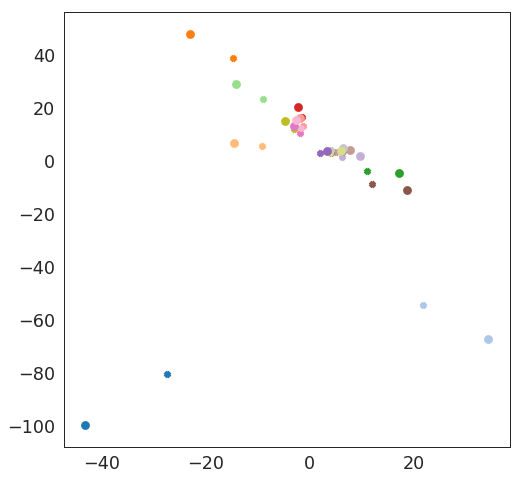

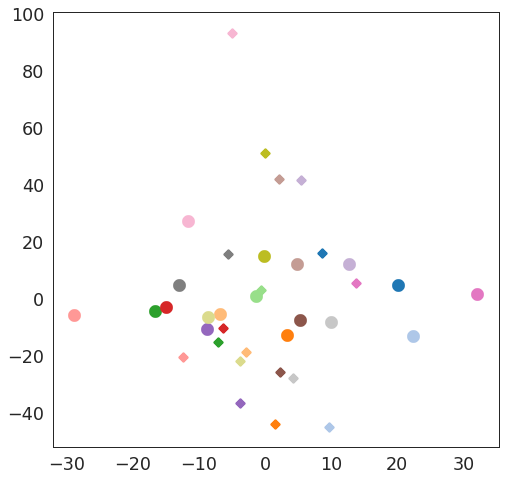

In [23]:
yeast.shape

(2698, 18)